# Sander van de Kamp
#### 500734351 
#### 09/03/2021
# Glass type 

In [43]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import itertools

# Analysis
### Goal
The goal for this dataset is to predict the type of glass based on the percentages of the materials that it is made off.
### shape
The dataframe only contains 214 rows with 10 different columns
### features
Analyse probleem
All the material percentages are stored as floats and the type of glass is stored as an integer value.

In [44]:
df = pd.read_csv('glass.csv')
df.head(5)
df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

# Prediction
## Classification
According to the sklearn guide to selecting the best estimators would be an ensemble model, which in this case I'd use the random forest classifier (RFC) because the RFC was designed for multiclass classifications and has a very highly rated accuracy for classifiers. Outside of that the sklearn guide suggests using Naive bayes and SVM (Linear or others).
## Hyperparams
#### Random Forest
- n_estimators to change the total number of 'trees' in the forest
- max_depth to change the limit of the layers in the tree, a too deep forest will easily overfit.
- max_leaf_nodes to limit how many leaves a tree can create, too many leaves can also cause overfitting
#### Support verctor machine
- C to change how fast the SVM learns
- kernel, the kernel function is to transform the data into the required form, where there are multiple different kernel options for it.
## Metrics

In [45]:
forest_params = {
    'n_estimators': [175, 200, 225, 250, 275],
    'max_depth': [5, 6, 7],
    'max_leaf_nodes': [200, 250, 300]
}

svm_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

# methoden
### Preproccesing
two types only have a single row of values, so they'll be dropped.
The features are also incredibly spread apart, which is why a min max scaler will be used to normalize the data.
### Classifiers
Random Forest and SVM
### metrics
Accuracy, it doesn't matter what or how it goes wrong, all it matters in this case is wether or not it is right or wrong.

In [46]:
df_type = df['Type']

normalized_df = (df - df.min()) / (df.max() - df.min()) # min maxes 
normalized_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,1.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,1.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,1.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,1.0



# visualisations

<ipython-input-47-9721fafb7832>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df[df.Type == type][df.columns[:-1]].hist(ax = ax)


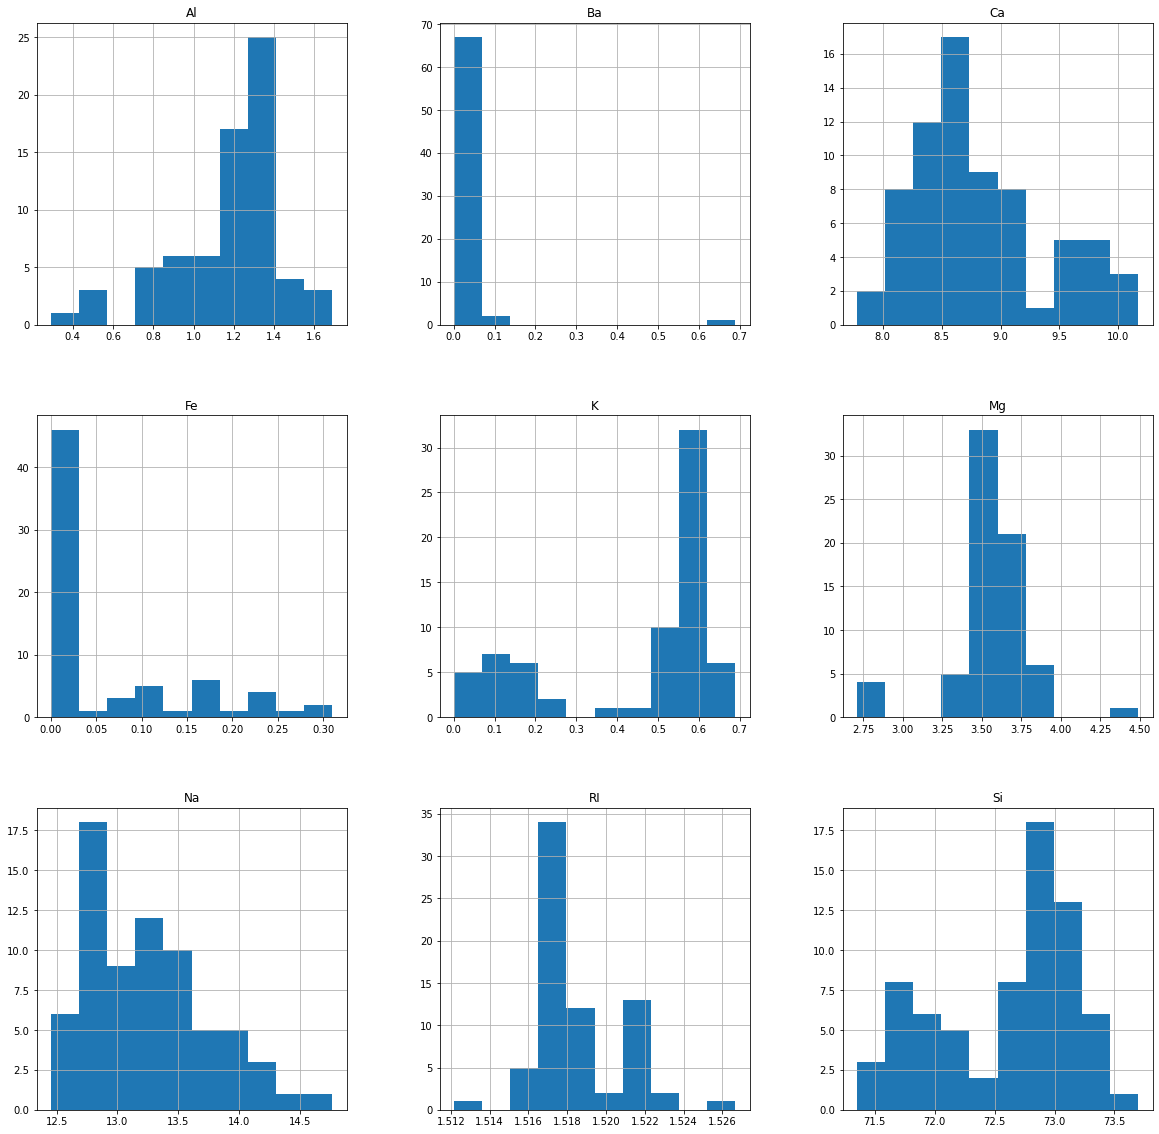

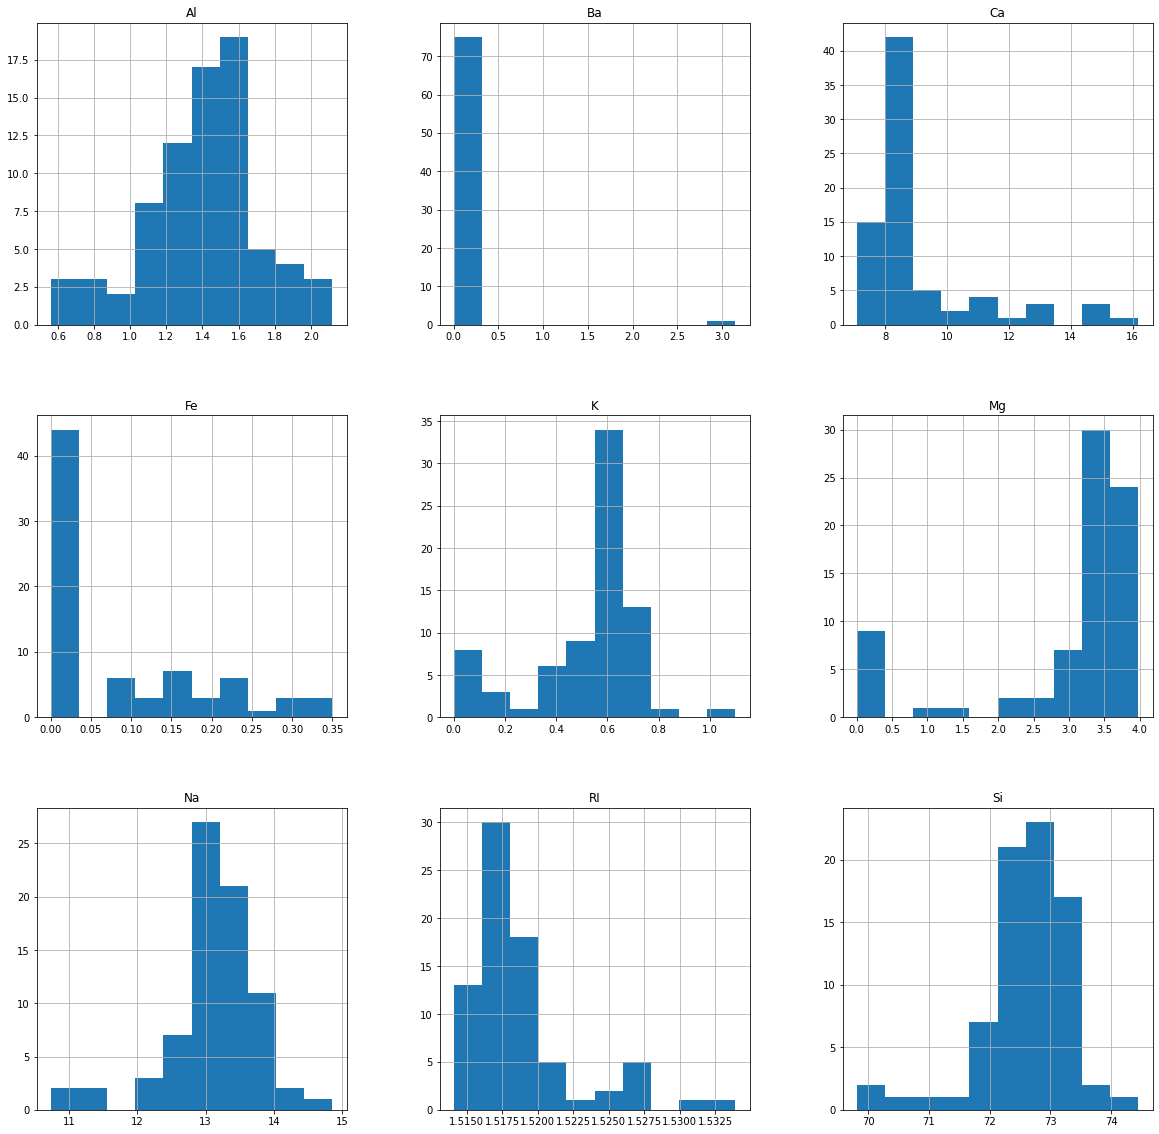

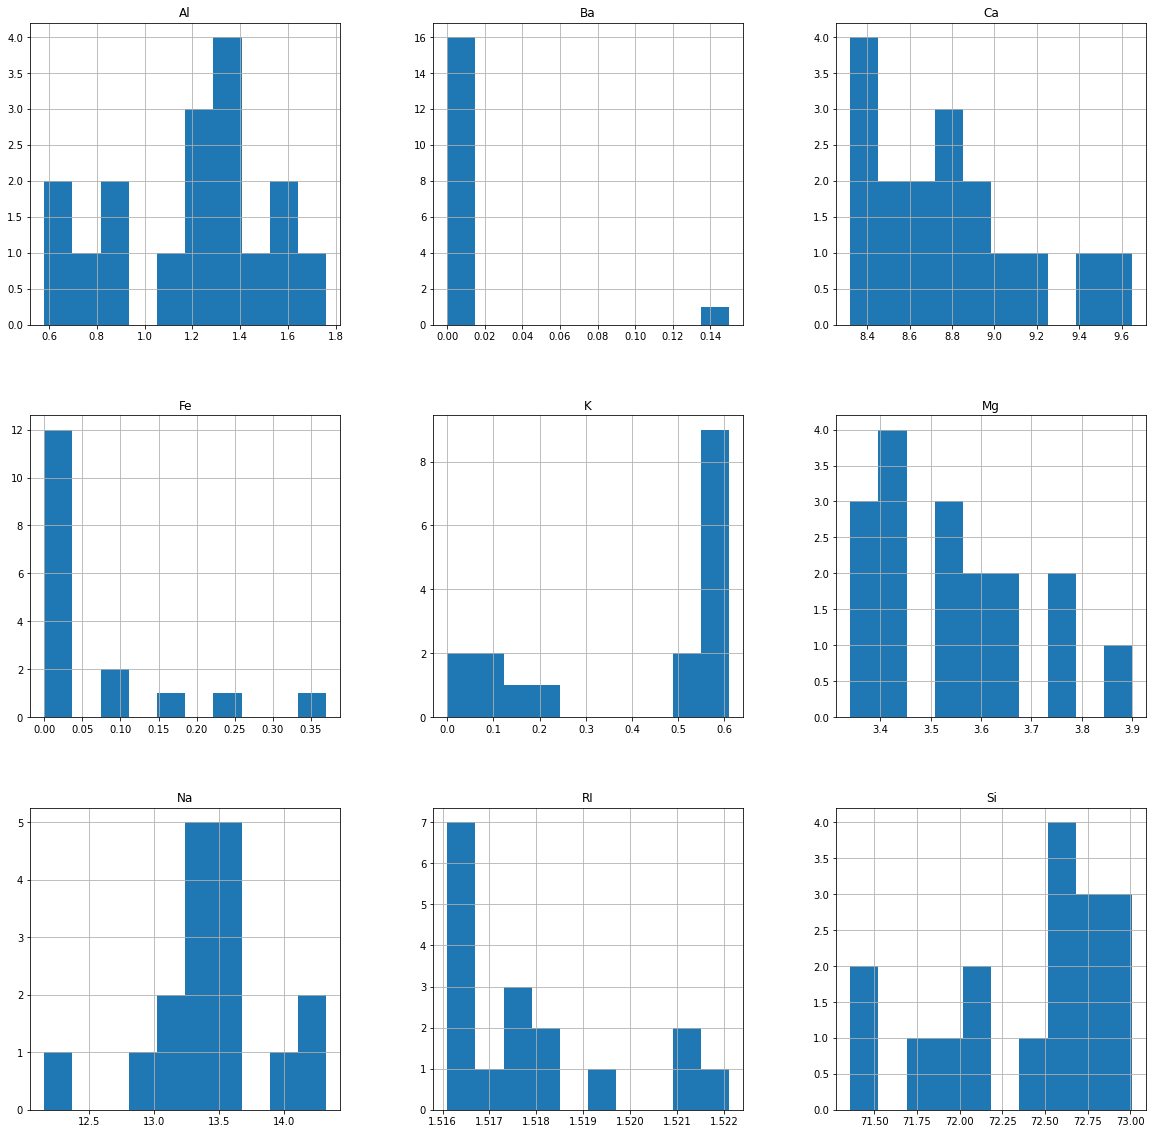

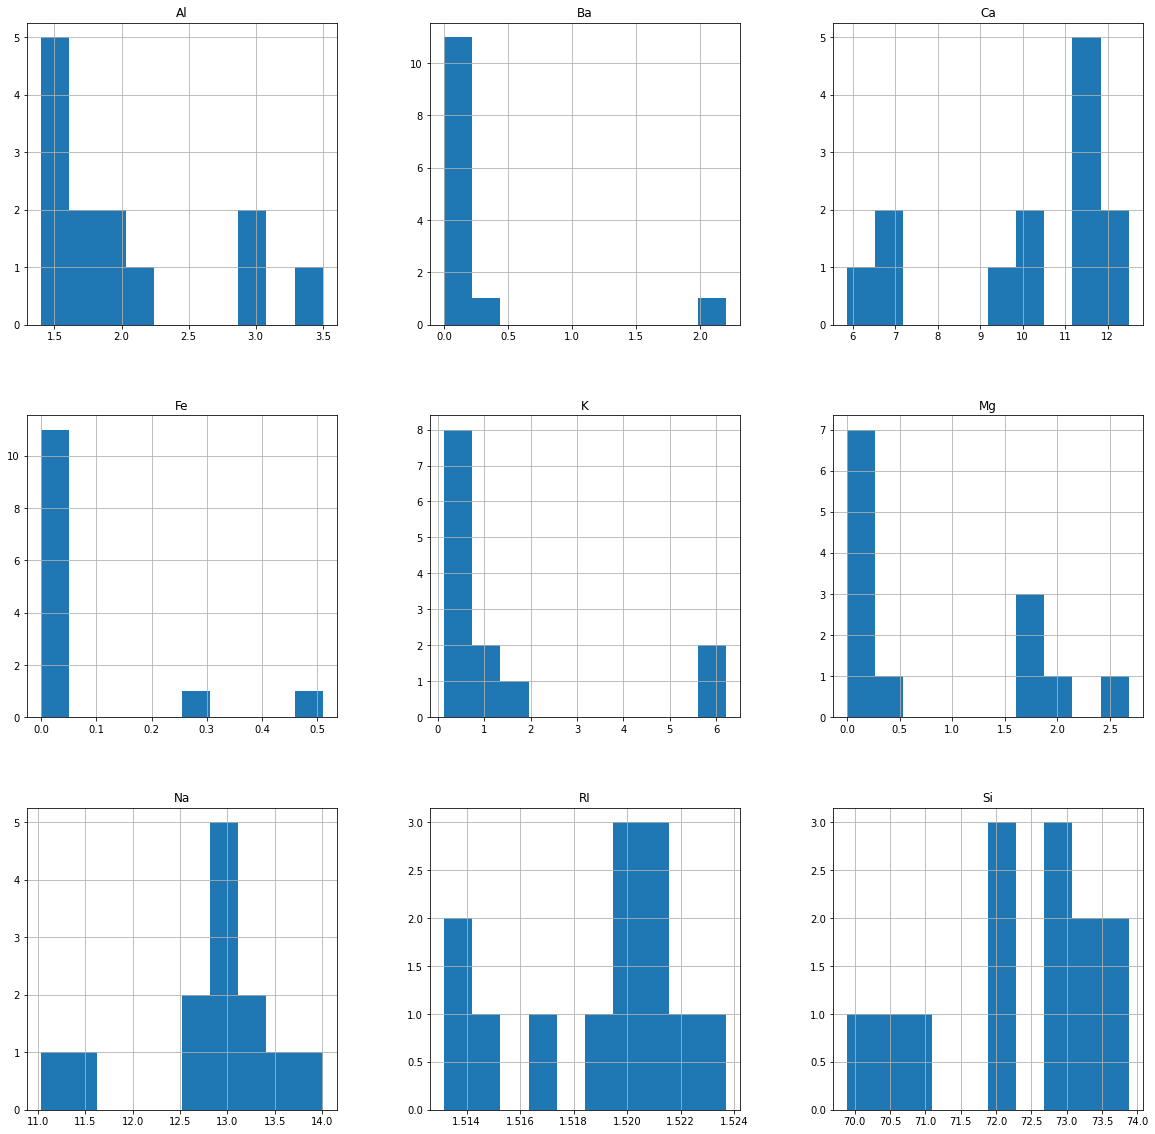

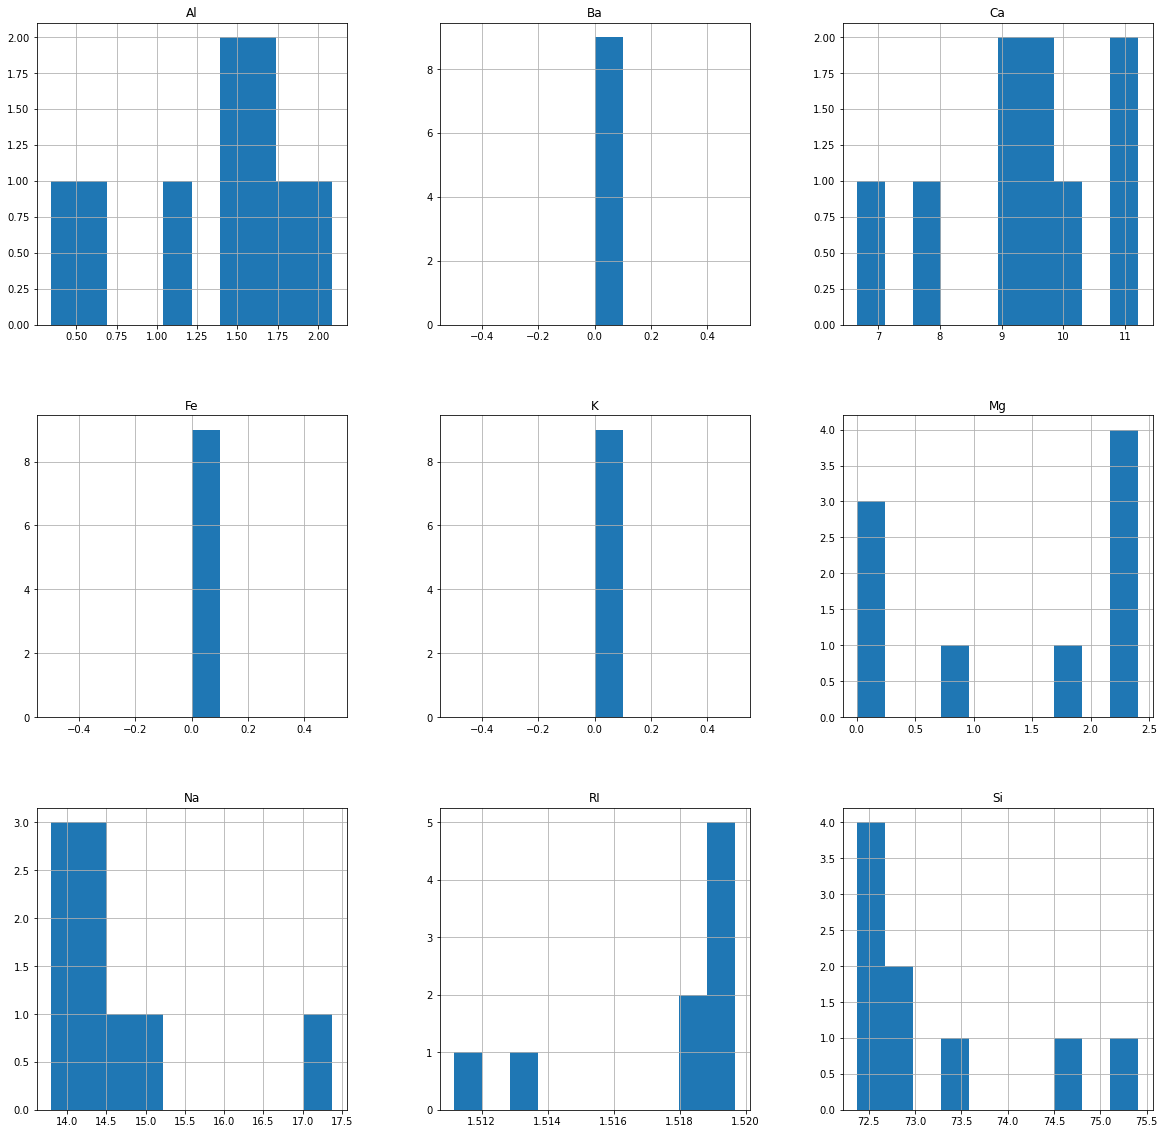

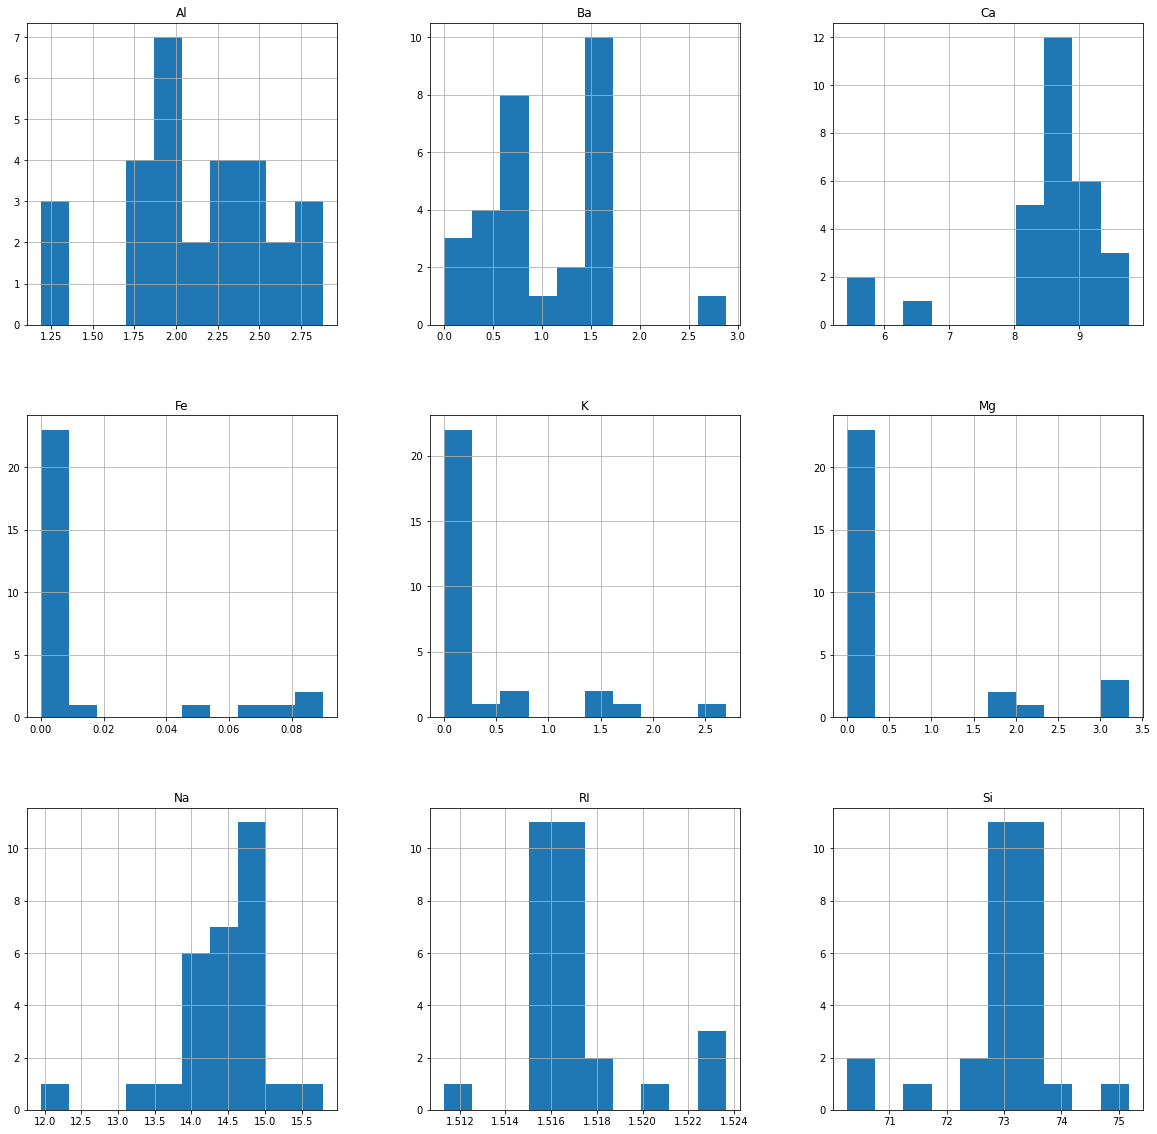

In [47]:
for type in df.Type.unique():
    fig = plt.figure(figsize = (20,20))
    ax = fig.gca()
    df[df.Type == type][df.columns[:-1]].hist(ax = ax)

df.drop('Type', axis = 1, inplace = True)

In [48]:
# Classifiers training and testing
X_train, X_test, y_train, y_test = train_test_split(df, df_type, test_size = 0.3, random_state = 42)
cv_count = LeaveOneOut()

svm = SVC()
forest = RandomForestClassifier()
nb = MultinomialNB()

In [49]:
grid_svm = GridSearchCV(svm, svm_params, cv = cv_count, n_jobs = -1)
grid_svm.fit(X_train, y_train)
print('Best svm hyperparameters are \n{}'.format(grid_svm.best_params_))

Best svm hyperparameters are 
{'C': 100, 'kernel': 'linear'}


In [50]:
grid_forest = GridSearchCV(forest, forest_params, cv = cv_count, n_jobs = -1)
grid_forest.fit(X_train, y_train)
print('Best random forest hyperparameters are \n{}'.format(grid_forest.best_params_))

Best random forest hyperparameters are 
{'max_depth': 6, 'max_leaf_nodes': 200, 'n_estimators': 275}


In [56]:
nb_cv = cross_val_score(nb, X_train, y_train, cv = cv_count, n_jobs = -1)


[0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1.]


## Performance metric 
accuracy

In [11]:
print('svm accuracy score:{}'.format(accuracy_score(y_test, grid_svm.predict(X_test))))
print('random forest accuracy score:{}'.format(accuracy_score(y_test, grid_forest.predict(X_test))))
print('naive bayes score:{}'.format(nb_cv.mean()))

svm accuracy score:0.676923076923077
random accuracy score:0.8
Linear accuracy score:0.4697986577181208


# Results
Random forest has an R2 score of 0.75, which is the highest of all three of the regressors. This score might not be the highest, but it does mean that it comes relatively close to predicting the right value.
After normalizing the data the accuracy score of the random forest went up to 0.8.